# ML as Function Approximation

## Gentle introduction to functions

What is a function?
- maps input to output
- can be thought as a curve or a table


In [53]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import torch

In [54]:
%matplotlib inline 

In [55]:
#Function as a table
x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y = np.sin(x)
list_xy = list(zip(x, y)) 
df_xy = pd.DataFrame(list_xy, columns = ['x', 'y=sin(x)'])  
df_xy.head()

,x,y=sin(x)
0,0.0,0.000000
1,0.1,0.099833
2,0.2,0.198669
3,0.3,0.295520
4,0.4,0.389418


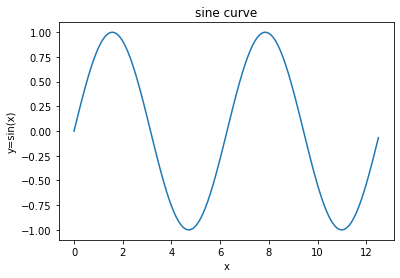

In [56]:
#Function as a curve
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y=sin(x)')
plt.title('sine curve')
plt.show()

### Linear regression as a function

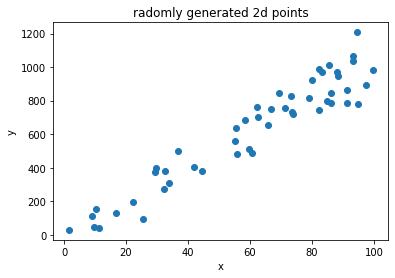

In [57]:
#Generate data for linear regression
beta=10
n=50
std_dev=100

x = np.random.rand(n) * 100
e = np.random.randn(n) * std_dev
y = x * beta + e
#list_xy = list(zip(x, y)) 
#df_xy = pd.DataFrame(list_xy, columns = ['x', 'y'])  
#df_xy.head()

# plot data
plt.xlabel('x')
plt.ylabel('y')
plt.title('radomly generated 2d points')
plt.scatter(x, y)

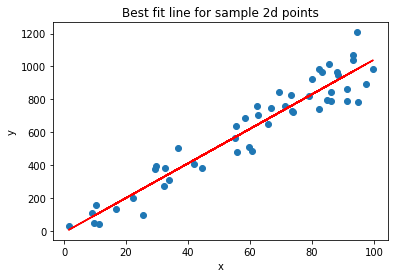

In [58]:
#convert data into matrix and vector
X_mat=np.vstack((np.ones(len(x)), x)).T
Y=y

#calculate coefficients for the best fit line
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)
yhat = X_mat.dot(beta_hat)
                 
# plot data and predictions
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best fit line for sample 2d points')
plt.scatter(x, y)
plt.plot(x, yhat, color='red')

## Introducing Neural Network (Universal Function Approximators)

Given data with labels(i.e. x and y values), we would like to approximate a function f(x) which is very close to y

|Scenario|Data=(x,y)|Function=f(x)|
|---|---|---|
| Best fit line| 2D points  | line approximating 2D points  |
| Image classification | pixels representing picture  | class of image e.g. dog, cat   |
| Audio2Text  | wave representing utterances  | words  |
| Translation  | sentences in multiple languages  | Translator function  |

We are looking for a machine that can generate functions given dataset representing x and y.
[Universal Approximation Theorem](https://medium.com/analytics-vidhya/you-dont-understand-neural-networks-until-you-understand-the-universal-approximation-theorem-85b3e7677126) gives us re-assurance that such a machine exists in our midst.
>_It states that a neural network with one hidden layer containing a sufficient but finite number of neurons can approximate any continuous function to a reasonable accuracy, under certain conditions for activation functions (namely, that they must be sigmoid-like)._

**Artificial Neuron**
<img src="images\BioNeuron.png" />

<br />
<br />

**Artificial Neural Network**
<img src="images\NeuralNetwork.png" />

### Terminology 
* Data : (x,y) x is input vector, y is label or output vector. e.g. 2D points.
* Batch : Subset of data that is processed in one pass through the network. 
* $\hat{y}$ : Approximating function that gets us close to y given x. Also referred as f(x) or f(w,x) where w is to be learnt. e.g red line in linear regression.
* Weights : Values of parameters learnt by the network represented by w. e.g. coefficients of best fit line.
* Loss : A function defined over the batch data that measures how far are we from the labels, a measure of _y-$\hat{y}$_. So this is function over approximating function f(x). e.g. summation of sqaure loss over all 2D points.
* Backprop : Process of adjusting weights by using the gradient of loss function to come up with better weights
* Optimizer : Process that assists us to quickly find optimal values of weight so as to minimize loss. This relies on back-propagation.
* Criterion : A human readable measure of model quality. Criterion:Human = Loss: NeuralNetwork

### Deveopment Loops
> We run development loop to come up with the desired approximating function given data. There are 2 loops, inner and outer
> * **Inner**:
> Take a step closer towards desired function by processing a subset of data. This is one pass through the neural network.
>* **Outer**
> Take a step closer towards desired function by processing all available data. We say that 1 epoch has elapsed.


### Inner Loop

***
$\mathbf{\text{Learning objective}}$<br/>
***
\begin{align}
w^{*} = \underset{w}{\textrm{arg min}} \; L(y,\hat{y}) \\
w^{*} = \underset{w}{\textrm{arg min}} \; L(y,f(w,x))
\end{align}

***
$\mathbf{\text{Back Prop}}$<br/>
***
1.&emsp;Initialize model with random weights $$w = w_{0}$$
2. For m = 1 to epochs:<br>
(a)&emsp;Run forward pass by estimating output given current weights $$\hat{y} = f(x,w)$$ 
(b)&emsp;Calculate loss based on the difference between estimated and real outputs. b is batch size. Square loss is an example of simple loss function. $$ L = \sum \limits_{j=1}^b (y-\hat{y})^2 $$ 
(c)&emsp;Calculate loss gradient with respect to weight and use it to update the weight parameter. Alpha is step size. $$ w = w - \nabla_{w} L * \alpha $$
(d)&emsp;Stop when Loss is very small or when patience runs out



### Outer Loop
* Split data into 3 parts : train, validate, test
* For each epoch, build model(aka approximate function) using training data. Then use validate to see the quality of model. Rinse, Repeat.
* Finally, run prediction against test data to see how good the model generalizes

## Addition as a mono-lingual translation task 
> Learning how to add using translation function <br/>
> 2 + 3 =5

* data = (2+3, 5)
* function = add(x1,x2)


In [ ]:
def get_random_2numbers(a=100000, b=999999):
    """ sample integers from a uniform distribution """
    
    left = random.randint(a,b)
    right = random.randint(a,b)
                           
    return (left, right)

In [ ]:
def get_sample_algebraic_sequence(left, right, op='+' ):
    if op=='+':
        answer = left + right
        lhs = "{0}+{1}".format(left, right)
        rhs =  "{0}".format(answer)
    elif op=='-':
        answer = left + right
        lhs = "{0}-{1}".format(answer, right)
        rhs =  "{0}".format(left)
    
    return (lhs, rhs)

In [ ]:
def get_sample_algebraic_list(num):
    data_list=[]
    for i in range(num):
        x,y = get_random_2numbers()
        lhs, rhs = get_sample_algebraic_sequence(x, y) 
        data_list.append([lhs,rhs])
    return data_list

In [ ]:
data_list = get_sample_algebraic_list(100000)
data_list[:5]

In [ ]:
df = pd.DataFrame(data_list, columns=['x','y'])
df.head()

In [ ]:
def text_addspace(df, columns_in, save_copy=True):
    """ Adds space between each character """

    for column_in in columns_in:     
        text_processed = df[column_in].apply(lambda s : " ".join(s))

        column_processed = column_in      
        #If column is not to be replaced, save the original column with underscore
        if(save_copy==True):
            column_in_copy = '_' + column_in
            df = df.assign(**{column_in_copy: df[column_in]})

        df = df.assign(**{column_processed: text_processed})

    return df

In [ ]:
df1= text_addspace(df, ['x','y'])
df1.head()

In [ ]:
train, validate, test = np.split(df1.sample(frac=1), [int(.7*len(df1)), int(.9*len(df1))])
train.describe()

In [52]:
! dir

 Volume in drive E is E
 Volume Serial Number is 16A5-CCB4

 Directory of E:\root\my\iit\src\fseq

12/30/2020  02:23 PM    <DIR>          .
12/30/2020  02:23 PM    <DIR>          ..
12/16/2020  03:42 PM    <DIR>          .ipynb_checkpoints
12/17/2020  02:25 PM    <DIR>          checkpoint
12/17/2020  01:40 PM    <DIR>          data
12/17/2020  01:40 PM    <DIR>          databin
12/30/2020  12:04 PM    <DIR>          images
12/17/2020  02:27 PM         2,061,649 output.txt
12/30/2020  02:23 PM            64,881 Seq2Seq.ipynb
               2 File(s)      2,126,530 bytes
               7 Dir(s)  986,380,460,032 bytes free


In [ ]:
!head Seq2Seq.ipynb

In [ ]:
train.head()

In [ ]:
work_dir=os.getcwd()
print("Current working directory is: {0}".format(work_dir))
data_dirpath = os.path.join(work_dir, 'data')
print("Data directory is: {0}".format(data_dirpath))

In [ ]:
train_summary_filepath = os.path.join(data_dirpath, 'train.summary')
train_text_filepath    = os.path.join(data_dirpath, 'train.text')
valid_summary_filepath = os.path.join(data_dirpath, 'valid.summary')
valid_text_filepath    = os.path.join(data_dirpath, 'valid.text')
test_summary_filepath  = os.path.join(data_dirpath, 'test.summary')
test_text_filepath     = os.path.join(data_dirpath, 'test.text')

In [ ]:
train.to_csv(train_summary_filepath, columns =['y'], header=False, index=False)
train.to_csv(train_text_filepath, columns =['x'], header=False, index=False)
validate.to_csv(valid_summary_filepath, columns =['y'], header=False, index=False)
validate.to_csv(valid_text_filepath, columns =['x'], header=False, index=False)
test.to_csv(test_summary_filepath, columns =['y'], header=False, index=False)
test.to_csv(test_text_filepath, columns =['x'], header=False, index=False)     

In [ ]:
! fairseq-preprocess --source-lang text --target-lang summary --trainpref data\train --validpref data\valid --testpref data\test --destdir databin --workers 1

In [ ]:
! fairseq-train databin --lr 0.0001 --lr-scheduler inverse_sqrt --warmup-init-lr 1e-07 --warmup-updates 1000 \
                        --clip-norm 0.1 --dropout 0.2 --max-tokens 4000 --optimizer adam  --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
                        --skip-invalid-size-inputs-valid-test --keep-last-epochs 10 --max-epoch 15 --arch lstm \
                        --save-dir checkpoint

In [ ]:
! fairseq-generate databin --path checkpoint\checkpoint_best.pt --gen-subset test --skip-invalid-size-inputs-valid-test \
                 --batch-size 128 --beam 5 --min-len 1 --nbest 1